In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
plt.rcParams.update({'font.size':16,'figure.figsize':(10,8)})

### Q) How do you upload files from Github to Azure Notebooks?

### A) Initially: https://notebooks.azure.com/help/libraries/creating/import-from-github
### Subsequently: 
   - Open terminal in Azure notebook library
   - cd library
### From GitHub to Azure:
   - git pull
### From Azure to GitHub:
   - git add your_file_names
   - git commit "your git commit message"
   - git push

### Q) How do you overlay several iterations of a dataset?

### A) Each time you call `plt.plot`, it will add data to the same plot.  
#### If you want the data on a new plot, call `plt.figure`.  

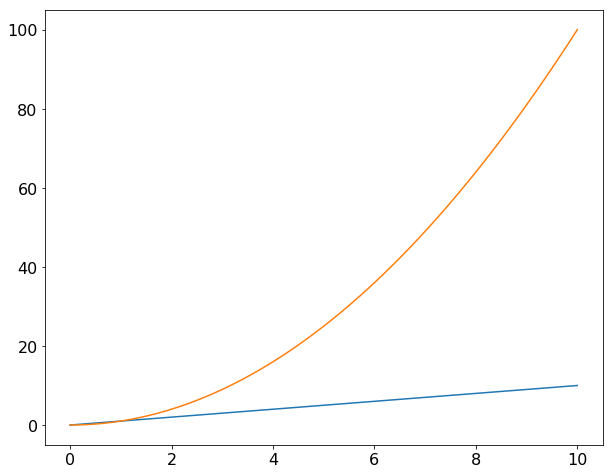

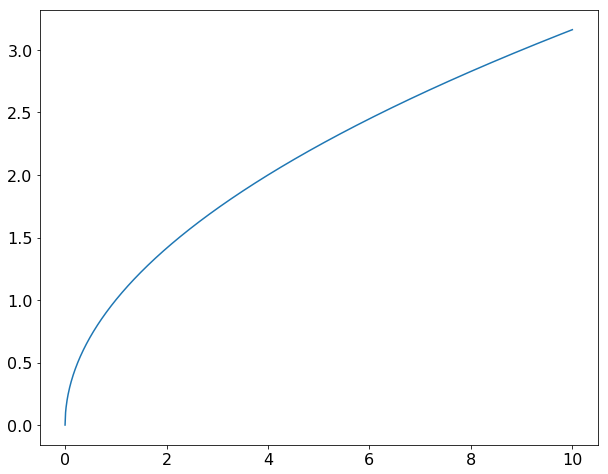

In [3]:
x = np.linspace(0,10,1000)
y1 = x
y2 = x**2
y3 = x**(1/2)
plt.plot(x,y1)
plt.plot(x,y2)
plt.figure()
plt.plot(x,y3);

### Q) How do you get large datasets and load them into a software analysis package? 

### A) Where to get large datasets depends on your research topic.  
#### Whatever file format you download, use Pandas (e.g. pd.read_csv, pd.read_excel) or another library to load that data.  
#### LMGTFY

### Q) What exactly does an ROC graph demonstrate?

### A) Quality of classification 
#### Sensitivity (what fraction of sick people get the "sick" diagnosis) vs specificity (what fraction of people that get the "sick" diagnosis are sick?)

### Q) What are some applications of PCA in neuroscience?

### A) Most commonly: visualizing clustered data or visualizing trajectories through high-dimensional state spaces

![pca-odors](images/pca-odors.png)

### Q) Can you tell me more about maximum likelihood estimation and clustering analysis.

### A) Yes.

### Q) How do you filter data that is sparse, contains special characters, and contains a mix of categorical and numeric data?
https://archive.ics.uci.edu/ml/machine-learning-databases/annealing/anneal.data 

### A) Like a boss

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/annealing/anneal.data',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,?,C,A,8,0,?,S,?,0,?,...,?,?,COIL,0.700,610.0,0,?,0,?,3
1,?,C,R,0,0,?,S,2,0,?,...,?,?,COIL,3.200,610.0,0,?,0,?,3
2,?,C,R,0,0,?,S,2,0,?,...,?,?,SHEET,0.700,1300.0,762,?,0,?,3
3,?,C,A,0,60,T,?,?,0,?,...,?,?,COIL,2.801,385.1,0,?,0,?,3
4,?,C,A,0,60,T,?,?,0,?,...,?,?,SHEET,0.801,255.0,269,?,0,?,3


#### Identify the characters that represent null values and load the data accordingly

In [5]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/annealing/anneal.data',header=None,na_values='?')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,NaN,C,A,8,0,NaN,S,NaN,0,NaN,...,NaN,NaN,COIL,0.700,610.0,0,NaN,0,NaN,3
1,NaN,C,R,0,0,NaN,S,2.0,0,NaN,...,NaN,NaN,COIL,3.200,610.0,0,NaN,0,NaN,3
2,NaN,C,R,0,0,NaN,S,2.0,0,NaN,...,NaN,NaN,SHEET,0.700,1300.0,762,NaN,0,NaN,3
3,NaN,C,A,0,60,T,NaN,NaN,0,NaN,...,NaN,NaN,COIL,2.801,385.1,0,NaN,0,NaN,3
4,NaN,C,A,0,60,T,NaN,NaN,0,NaN,...,NaN,NaN,SHEET,0.801,255.0,269,NaN,0,NaN,3


#### Check the column types (and change if necessary)

In [6]:
df.dtypes.head()

0    object
1    object
2    object
3     int64
4     int64
dtype: object

In [7]:
df.dtypes[3] = 'object' # For example

#### Apply the one-hot encoding to turn the categorical data into numeric data

In [8]:
df = pd.get_dummies(df)
df.head()

,3,4,7,8,12,18,22,25,28,29,...,27_Y,31_COIL,31_SHEET,35_N,35_Y,38_1,38_2,38_3,38_5,38_U
0,8,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,1,0,0
1,0,0,2.0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,0,0,0,0,0,1,0,0
2,0,0,2.0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,0,1,0,0
3,0,60,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,1,0,0
4,0,60,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,0,1,0,0


#### Impute missing values, drop bad columns and rows, etc.  

### Q) How do you visualize networks that result from weighted correlation network analysis (WGCNA). 
https://github.com/SamBuckberry/RUN-WGCNA/tree/master/plots

### A) WGCNA is just a combination of the techniques we have covered in class: correlation matrices, dendrograms, clustering, identifying principal components, etc.  

### Q) How can we pick out the errors in a large data set and remove them efficiently?

### A) What is an error?  
- Use `.replace('bad','good')` to replace specific values with correct values
- Use `.fillna(0) ` to replace missing values with a fixed replacement value (e.g. 0)
- Use imputation to replace missing values with more likely values
- Use `.drop` to get rid of bad rows or columns

### Q) Is there a way to determine which visualization methods will be the most effective, given a large data set?

### A) Ask yourself about possible data patterns before possible visualization techniques.  
#### Visualization choices flow from patterns in the data and from the kinds of questions that you want to ask

### Q) Here is a website I was looking at that gives an example for the topics of data cleaning and loading: https://mdl.library.utoronto.ca/technology/tutorials/cleaning-data-python

### A) Thank you!

### Q) To analyze data with a range and a mean value, is it appropriate to utilize a pygal visualization library as a box plot, or is there easier/better way to visualize such data? 

### A) You can just use matplotlib (what we have been using all along), e.g.:

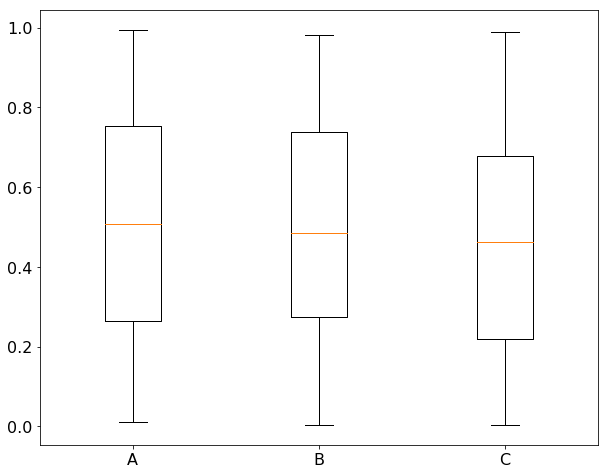

In [9]:
# When you have all the data points
data = np.random.rand(100,3)
plt.boxplot(data,labels=['A','B','C']);

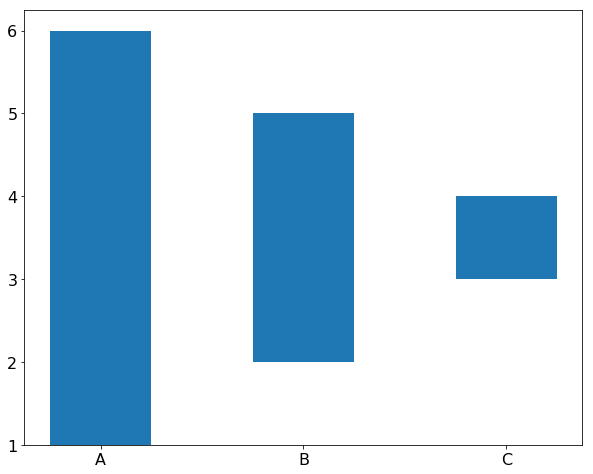

In [10]:
# When you only have a range
x = ['A','B','C']
bottom = np.array([1,2,3])
top = np.array([6,5,4])
height = top - bottom
plt.bar(x, height, 0.5, bottom);

### Q) How do we initialize a geoplotlib library for coding?

### A) 
#### `!pip install geoplotlib`
#### `import geoplotlib`

### Q) What's the first thing you do when you upload a dataset to assess it's quality. 
#### There is a package in R that helps visualize missing data values. Is there a similar package in python?

### A) http://www.residentmar.io/2016/03/28/missingno.html

In [11]:
df = pd.DataFrame(np.random.rand(100,3),columns=['A','B','C'])
df.loc[4:25,'A'] = None
df.loc[46:49,'C'] = None

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
A    78 non-null float64
B    100 non-null float64
C    96 non-null float64
dtypes: float64(3)
memory usage: 2.4 KB


In [13]:
df.isnull().sum()

A    22
B     0
C     4
dtype: int64

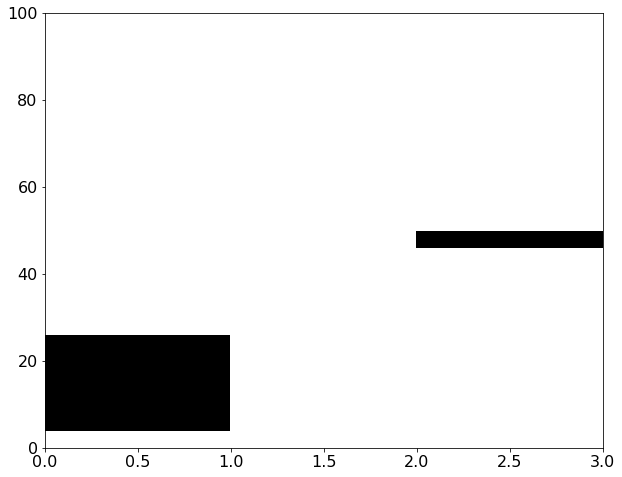

In [14]:
plt.pcolor(df.isnull(),cmap='Greys');

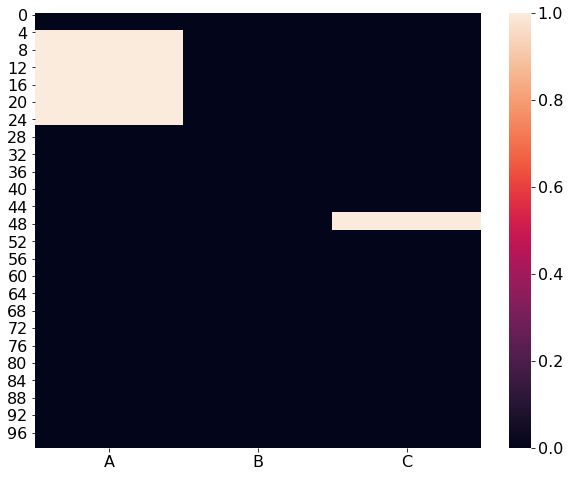

In [15]:
import seaborn as sns
sns.heatmap(df.isnull()*1)

### Q) I'd love to see a visualization you've done that you're most proud of. Or most embarrassed by. Either way.

![odor-prediction](images/odor-prediction.png)

### Q) Are there packaged "themes" like with colors, shapes (or line weights) to make your plots prettier?

### A) Seaborn

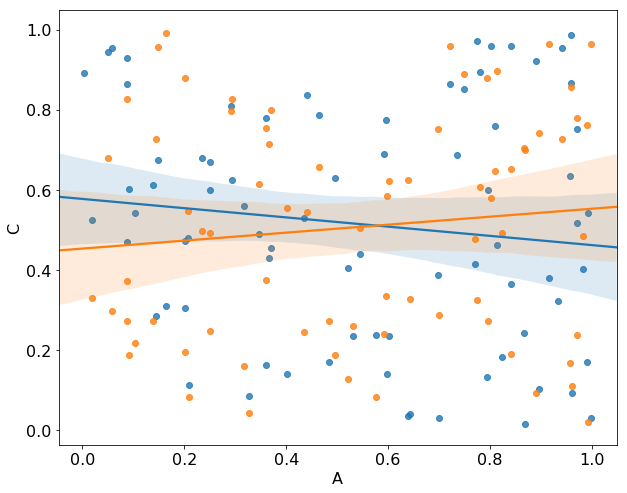

In [16]:
import seaborn as sns
sns.regplot(df['A'],df['B']);
sns.regplot(df['A'],df['C']);

#### Or play around with settings as in: http://jonchar.net/notebooks/matplotlib-styling/

#### Or change `plt.rcParams`

In [17]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.mencoder_args': [],
          'animation.mencoder_path': 'mencoder',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'k',
          'axes.facecolor': 'w',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use

### Q) How do you convert a dataset found online into a csv in order to upload it?

### A) If you can download it:
#### - If it is a text file (e.g. csv), use `pd.read_csv` with the correct delimiter.  
#### - If it is an excel file, use `pd.read_excel`.  
#### - If it is some other format, google the correct module for loading it.  

### If you can't download it:
#### - If you can copy and paste it, paste it into e.g. Excel and save it, then see above.  
#### - If you can't copy it, you may need a web scraping tool e.g. `BeautifulSoup`.  

### Q) What are some of the best ways to visualize data from PCA?

### A) Make a scatter plot of the data using the new dimensions as axes (2 or 3 of them), then cluster the data

In [18]:
y = np.random.rand(100,5)
y[50:,:] += 2
y[:,2] = y[:,0] + y[:,1]
y[:,3] = y[:,0] - y[:,1]
y[:,4] = y[:,0] + 2*y[:,1]

pca = PCA(n_components=2)
y_new = pca.fit_transform(y)
y_new.shape

(100, 2)

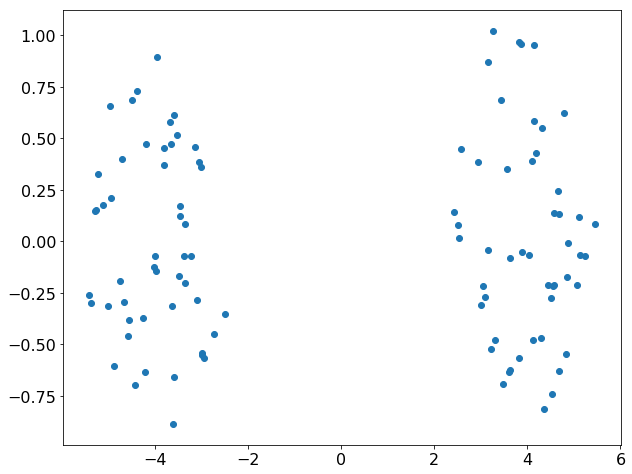

In [19]:
plt.scatter(y_new[:,0],y_new[:,1])

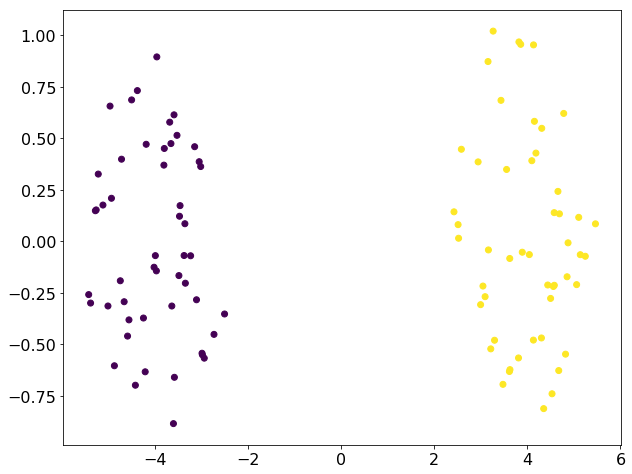

In [20]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(y);
plt.scatter(y_new[:,0],y_new[:,1],c=kmeans.labels_);

### Q) What are some basic data mining steps? 

### A) 
- Find a data set
- Download it
- Clean it
- Explore it with visualizations
- Perform analyses (using statistical methods)
- Make more visualizations
- Draw conclusions

### Q) How do you make heatmaps?

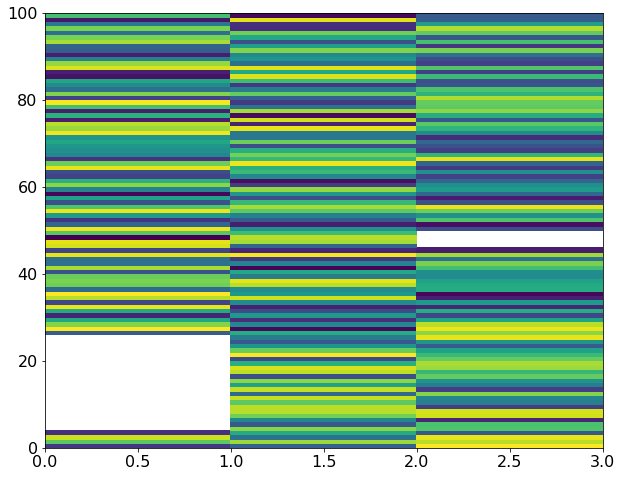

In [21]:
plt.pcolor(df);

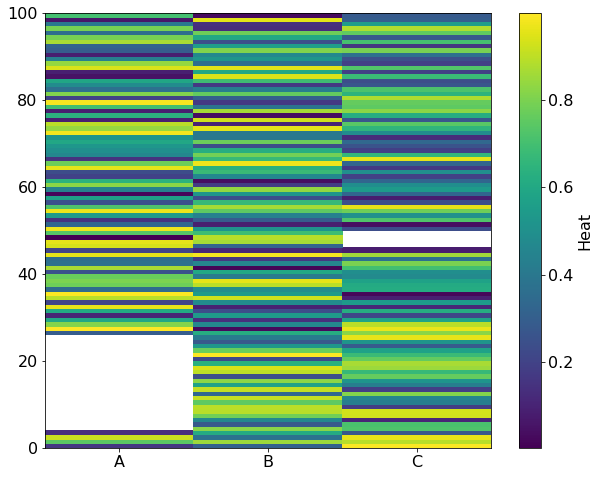

In [22]:
plt.pcolor(df);
plt.xticks(np.arange(0.5,3.4),['A','B','C']);
plt.colorbar().set_label('Heat')

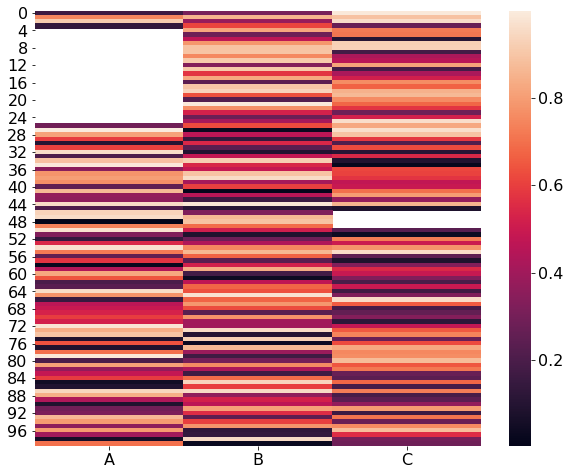

In [23]:
sns.heatmap(df);

### Q) How do you turn this kind of data: 

In [24]:
df = pd.DataFrame(np.random.rand(8,3),columns=['X','Y','Z'],index=[[1,1,2,2,3,3,4,4],['L','R']*4])
df

X         Y         Z
1 L  0.943311  0.904289  0.191290
  R  0.920711  0.191266  0.794620
2 L  0.105377  0.189011  0.142341
  R  0.481368  0.457567  0.277049
3 L  0.085113  0.179082  0.115717
  R  0.500304  0.529765  0.222332
4 L  0.031264  0.384687  0.980175
  R  0.562457  0.053123  0.986783

### Into this kind of data?

In [25]:
df.swaplevel()

,,X,Y,Z
L,1,0.943311,0.904289,0.191290
R,1,0.920711,0.191266,0.794620
L,2,0.105377,0.189011,0.142341
R,2,0.481368,0.457567,0.277049
L,3,0.085113,0.179082,0.115717
R,3,0.500304,0.529765,0.222332
L,4,0.031264,0.384687,0.980175
R,4,0.562457,0.053123,0.986783


### Or into this kind of data?

In [26]:
df.swaplevel().unstack()

X                                       Y                      \
          1         2         3         4         1         2         3   
L  0.943311  0.105377  0.085113  0.031264  0.904289  0.189011  0.179082   
R  0.920711  0.481368  0.500304  0.562457  0.191266  0.457567  0.529765   

                   Z                                
          4        1         2         3         4  
L  0.384687  0.19129  0.142341  0.115717  0.980175  
R  0.053123  0.79462  0.277049  0.222332  0.986783

### Or even into this kind of data?

In [27]:
df.unstack().swaplevel(axis=1)

,L,R,L,R,L,R
,X,X,Y,Y,Z,Z
1,0.943311,0.920711,0.904289,0.191266,0.191290,0.794620
2,0.105377,0.481368,0.189011,0.457567,0.142341,0.277049
3,0.085113,0.500304,0.179082,0.529765,0.115717,0.222332
4,0.031264,0.562457,0.384687,0.053123,0.980175,0.986783


### Or (if one may be so bold) into this kind of data?

In [28]:
df.unstack().swaplevel(axis=1).sort_index(axis=1)

L                             R                    
          X         Y         Z         X         Y         Z
1  0.943311  0.904289  0.191290  0.920711  0.191266  0.794620
2  0.105377  0.189011  0.142341  0.481368  0.457567  0.277049
3  0.085113  0.179082  0.115717  0.500304  0.529765  0.222332
4  0.031264  0.384687  0.980175  0.562457  0.053123  0.986783

### Q) How exactly could you plot these coordinates so that different colours represent different labels?

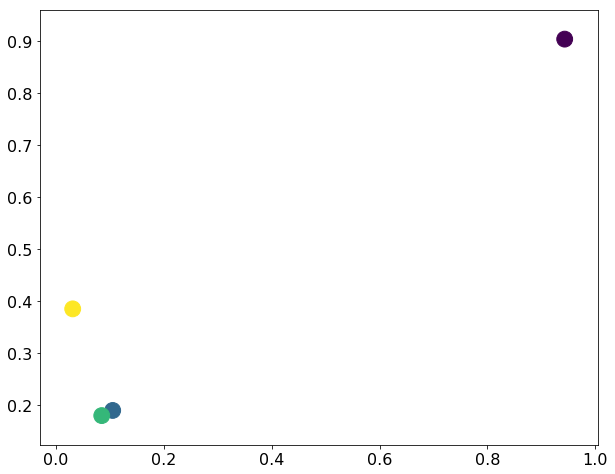

In [29]:
df_new = df.unstack().swaplevel(axis=1).sort_index(axis=1)
plt.scatter(df_new['L']['X'],df_new['L']['Y'],s=250,c=df_new.index);

### Q) How do you load raw byte data into python? 

### A) Technically, with `f = open('your_file_name','rb')`.  

#### But you may have a special file format that you are trying to load and need a special library for it.  

### Q) How can I use the MRI's in this database for the final project. 
- http://brainweb.bic.mni.mcgill.ca/brainweb/anatomic_normal_20.html

### A) These are `minc` files, so you can load them with this library:
- http://nipy.org/nibabel/reference/nibabel.minc2.html

### Q) How do you manually rotate a three-dimensional scatter plot?

In [30]:
!pip install ipyvolume

In [31]:
%matplotlib notebook
import numpy as np
import ipyvolume.pylab as p3
p3.style.use("dark") # looks better

### Option #1: Using Matplotlib (what we've been using)

<IPython.core.display.Javascript object>


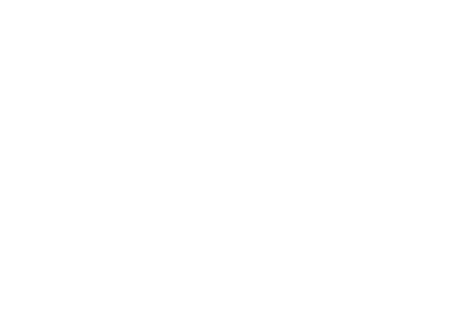

In [32]:
%matplotlib notebook
# The above line is necessary to make this interactive
from mpl_toolkits.mplot3d import Axes3D # Necessary to make this 3D

data = np.random.rand(100,3) # Made up data

fig = plt.figure() # Make a figure canvas
ax = fig.add_subplot(111, projection='3d') # Add a 3d set of axes
ax.scatter(*data.T) # Make a scatter plot

### Option #2: Animate it

<IPython.core.display.Javascript object>


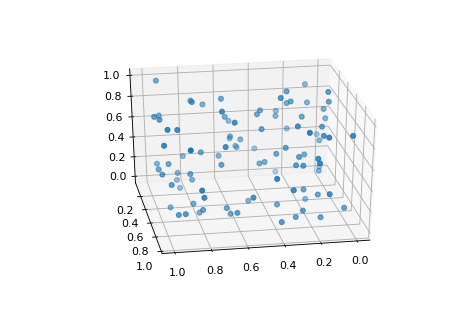

In [33]:
%matplotlib notebook
# The above line is necessary to make this interactive
from mpl_toolkits.mplot3d import Axes3D # Necessary to make this 3D
from matplotlib.animation import FuncAnimation # Necessary for animation
from IPython.display import HTML # Necessary to make the animation work in a Jupyter notebook (HTML based)

fig = plt.figure() # Make a figure canvas
ax = fig.add_subplot(111, projection='3d') # Add a 3d set of axes
ax.scatter(*data.T) # Make a scatter plot

def animate(angle):
    """The animation function; it changes the angle with each frame"""
    ax.view_init(30, angle)

ani = FuncAnimation(fig, animate, frames=range(0,360,10)) # Animates the figure in 10 degree view angle increments

HTML(ani.to_jshtml()); # Displays the animation. Don't forget the semi-colon or you will get a duplicate static version.  

### Option #3: Use a more sophisticated graphics library

In [34]:
import plotly.offline as py # See examples at e.g. https://plot.ly/pandas/3d-scatter-plots/
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
trace1 = go.Scatter3d(
    x=data[:,0],
    y=data[:,1],
    z=data[:,2],
    mode='markers',
)

fig = dict(data=[trace1,])
py.iplot(fig, validate=False)

### Q) How do you take certain columns and rows out of a data set. 

In [47]:
df = pd.DataFrame(np.random.rand(10,3),columns=['X','Y','Z'],index=[x for x in 'abcdefghij'])
df

,X,Y,Z
a,0.805754,0.355484,0.392695
b,0.062490,0.400264,0.249789
c,0.255665,0.856528,0.024053
d,0.047461,0.697334,0.445978
e,0.469125,0.655873,0.159504
f,0.823848,0.299934,0.375628
g,0.324559,0.843549,0.422687
h,0.906143,0.534183,0.534873
i,0.808329,0.371670,0.399723
j,0.464238,0.469603,0.622330


### You can drop with `drop`

In [51]:
df.drop(['d','g']) # For rows

,X,Y,Z
a,0.805754,0.355484,0.392695
b,0.062490,0.400264,0.249789
c,0.255665,0.856528,0.024053
e,0.469125,0.655873,0.159504
f,0.823848,0.299934,0.375628
h,0.906143,0.534183,0.534873
i,0.808329,0.371670,0.399723
j,0.464238,0.469603,0.622330


In [52]:
df.drop(['Y'],axis=1) # For columns

,X,Z
a,0.805754,0.392695
b,0.062490,0.249789
c,0.255665,0.024053
d,0.047461,0.445978
e,0.469125,0.159504
f,0.823848,0.375628
g,0.324559,0.422687
h,0.906143,0.534873
i,0.808329,0.399723
j,0.464238,0.622330


### Or by just selecting the rows/columns you want to keep

In [53]:
df[['X','Z']]

,X,Z
a,0.805754,0.392695
b,0.062490,0.249789
c,0.255665,0.024053
d,0.047461,0.445978
e,0.469125,0.159504
f,0.823848,0.375628
g,0.324559,0.422687
h,0.906143,0.534873
i,0.808329,0.399723
j,0.464238,0.622330


In [54]:
df.loc[['a','c','e','g']]

,X,Y,Z
a,0.805754,0.355484,0.392695
c,0.255665,0.856528,0.024053
e,0.469125,0.655873,0.159504
g,0.324559,0.843549,0.422687


### Or selecting/dropping by a match condition

In [62]:
df[df.sum(axis=1)>1.5] # Keep only those rows with a sum > 1.5

,X,Y,Z
a,0.805754,0.355484,0.392695
g,0.324559,0.843549,0.422687
h,0.906143,0.534183,0.534873
i,0.808329,0.371670,0.399723
j,0.464238,0.469603,0.622330


In [84]:
df.loc[:,df.sum(axis=0)>4] # Keep only those columns with a sum > 4

,X,Y
a,0.805754,0.355484
b,0.062490,0.400264
c,0.255665,0.856528
d,0.047461,0.697334
e,0.469125,0.655873
f,0.823848,0.299934
g,0.324559,0.843549
h,0.906143,0.534183
i,0.808329,0.371670
j,0.464238,0.469603


### Also see: https://jeffdelaney.me/blog/useful-snippets-in-pandas/

### Q) How do I do imputation if some of my data is in float format and some is in string format, without removing the string data? 

In [98]:
df['GoT'] = ['Daenerys','Jon','Cersei','Arya','Tyrion','Sansa','Joffrey','Jaime','Brienne','Bran']
df.loc[['d','e'],'Y'] = None
df

,X,Y,Z,GoT
a,0.805754,0.355484,0.392695,Daenerys
b,0.062490,0.400264,0.249789,Jon
c,0.255665,0.856528,0.024053,Cersei
d,0.047461,NaN,0.445978,Arya
e,0.469125,NaN,0.159504,Tyrion
f,0.823848,0.299934,0.375628,Sansa
g,0.324559,0.843549,0.422687,Joffrey
h,0.906143,0.534183,0.534873,Jaime
i,0.808329,0.371670,0.399723,Brienne
j,0.464238,0.469603,0.622330,Bran


### A) Temporarily remove the string columns, impute, then put them back in.

In [99]:
df_num = df.loc[:,df.dtypes!='object'] # Extract the non-string columns
df_num = df_num.fillna(df_num.mean()) # Impute with the column means
df.loc[:,df.dtypes!='object'] = df_num # Put the imputed values back in to the original dataframe
df

,X,Y,Z,GoT
a,0.805754,0.355484,0.392695,Daenerys
b,0.062490,0.400264,0.249789,Jon
c,0.255665,0.856528,0.024053,Cersei
d,0.047461,0.516402,0.445978,Arya
e,0.469125,0.516402,0.159504,Tyrion
f,0.823848,0.299934,0.375628,Sansa
g,0.324559,0.843549,0.422687,Joffrey
h,0.906143,0.534183,0.534873,Jaime
i,0.808329,0.371670,0.399723,Brienne
j,0.464238,0.469603,0.622330,Bran


### Q) How do you pull only some of the information out of a cell, especially if it is a string?

### A) Apply string operations to your columns

In [102]:
df['GoT'] = df['GoT'].map(lambda x:x[:3])
df

,X,Y,Z,GoT
a,0.805754,0.355484,0.392695,Dae
b,0.062490,0.400264,0.249789,Jon
c,0.255665,0.856528,0.024053,Cer
d,0.047461,0.516402,0.445978,Ary
e,0.469125,0.516402,0.159504,Tyr
f,0.823848,0.299934,0.375628,San
g,0.324559,0.843549,0.422687,Jof
h,0.906143,0.534183,0.534873,Jai
i,0.808329,0.371670,0.399723,Bri
j,0.464238,0.469603,0.622330,Bra


### Q) How do you basic formatting on a graph (changing colors, sizes of things, fonts, etc.)

### Option #1: Do it when you issue the plotting command

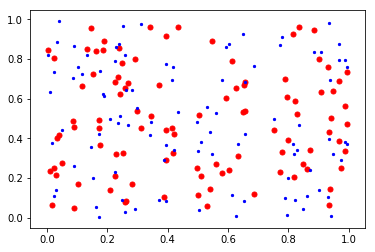

In [119]:
%matplotlib inline
X = data[:,0]
Y1 = data[:,1]
Y2 = data[:,2]
plt.scatter(X,Y1,c='red',s=25)
plt.scatter(X,Y2,c='blue',s=5)

### Option #2: Do it after the plotting command

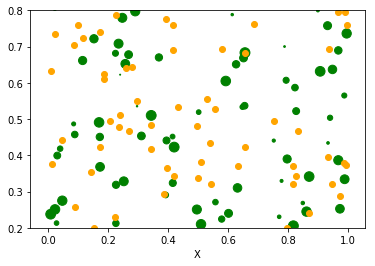

In [127]:
s1 = plt.scatter(X,Y1)
s2 = plt.scatter(X,Y2)
s1.set_color('green')
s2.set_color('orange')
s1.set_sizes(range(100))
plt.xlabel('X')
plt.ylim(0.2,0.8);

### Option #3: Set all your defaults at the beginnning


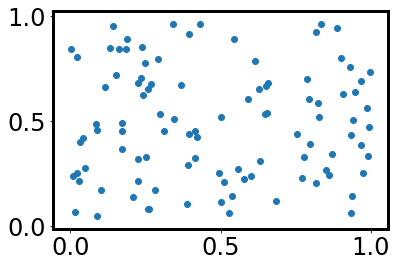

In [133]:
plt.rcParams.update({'font.size':24,'axes.linewidth': 3})
plt.scatter(X,Y1)

In [137]:
import warnings
warnings.filterwarnings('ignore')

### Option #4: Take your inspiration from XKCD

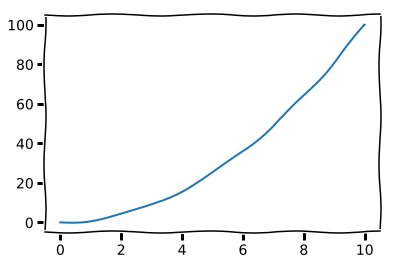

In [139]:
plt.xkcd()
X = np.linspace(0,10,1000)
Y = X**2
plt.plot(X,Y);

### Q) How do you find data across studies that share multiple variables to compare.  

### A) This is hard because research across labs is often poorly coordinated

#### - Look for meta-analyses that have already done this work for you

#### - Look for databases and other tools that let you query the results of already-curated collections of papers

### Q) Given two dataframes where the rows are names; how can you make a new dataframe with the names only common to both dataframes

### A) Use `df.join`

In [142]:
df.head()

,X,Y,Z,GoT
a,0.805754,0.355484,0.392695,Dae
b,0.062490,0.400264,0.249789,Jon
c,0.255665,0.856528,0.024053,Cer
d,0.047461,0.516402,0.445978,Ary
e,0.469125,0.516402,0.159504,Tyr


In [145]:
df2 = pd.DataFrame(['Targaryen','Stark','Lannister'],index=['a','d','e'],columns=['House'])
df2

,House
a,Targaryen
d,Stark
e,Lannister


#### All of the rows from the first dataframe, combined with values from the second

In [146]:
df.join(df2)

,X,Y,Z,GoT,House
a,0.805754,0.355484,0.392695,Dae,Targaryen
b,0.062490,0.400264,0.249789,Jon,NaN
c,0.255665,0.856528,0.024053,Cer,NaN
d,0.047461,0.516402,0.445978,Ary,Stark
e,0.469125,0.516402,0.159504,Tyr,Lannister
f,0.823848,0.299934,0.375628,San,NaN
g,0.324559,0.843549,0.422687,Jof,NaN
h,0.906143,0.534183,0.534873,Jai,NaN
i,0.808329,0.371670,0.399723,Bri,NaN
j,0.464238,0.469603,0.622330,Bra,NaN


#### Only the rows present in both dataframes

In [148]:
df.join(df2,how='inner')

,X,Y,Z,GoT,House
a,0.805754,0.355484,0.392695,Dae,Targaryen
d,0.047461,0.516402,0.445978,Ary,Stark
e,0.469125,0.516402,0.159504,Tyr,Lannister


### Q) How can you visualize the brain so that each region has a different color, corresponding to a value for that brain region?  

### A) Chloropleth Maps

In [158]:
plt.rcdefaults()
plt.rcParams.update({'font.size':16,'figure.figsize':(10,8)})

In [151]:
!pip install geopandas

  Using cached geopandas-0.3.0-py2.py3-none-any.whl
  Using cached pyproj-1.9.5.1.tar.gz
  Using cached Shapely-1.6.4.post1-cp35-cp35m-manylinux1_x86_64.whl
  Using cached descartes-1.1.0-py3-none-any.whl
  Using cached Fiona-1.7.11.post1-cp35-cp35m-manylinux1_x86_64.whl
  Using cached cligj-0.4.0-py3-none-any.whl
  Using cached munch-2.3.0.tar.gz
  Using cached click-plugins-1.0.3.tar.gz
  Running setup.py bdist_wheel for pyproj ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/85/dd/2f/d1ed07a507c7adb330cda0afcc96cae8e9abb4d85bbb788bdf
  Running setup.py bdist_wheel for munch ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/f5/7c/b6/d42f24a8b66709c0e6f97a799f95dd5267e58709151704cfdf
  Running setup.py bdist_wheel for click-plugins ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/70/d7/3d/188128669f2aa42f6008217d9e2e6826d398dc3e361c0fcb75
Successfully built pyproj munch click-plugins


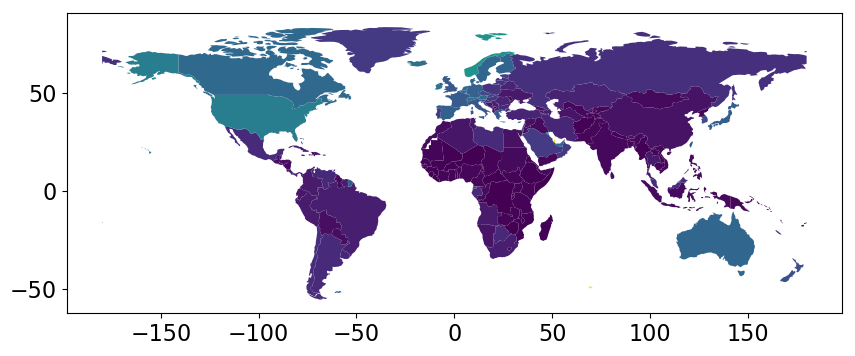

In [159]:
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
world.plot(column='gdp_per_cap');

In [165]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",0.000784
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,0.008618
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",0.005993
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,...",0.038408
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,0.014027


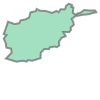

In [168]:
world['geometry'][0] # A nicely rendered version of this polygon (the borders of Afghanistan)

### Country borders are just polygons; so are brain regions (in 2D sections)

In [169]:
str(world['geometry'][0]) # The string representation of this polygon

'POLYGON ((61.21081709172574 35.65007233330923, 62.23065148300589 35.27066396742229, 62.98466230657661 35.40404083916762, 63.19353844590035 35.85716563571891, 63.98289594915871 36.0079574651466, 64.5464791197339 36.31207326918427, 64.74610517767741 37.1118177353333, 65.58894778835784 37.30521678318564, 65.74563073106683 37.66116404881207, 66.21738488145934 37.39379018813392, 66.51860680528867 37.36278432875879, 67.07578209825962 37.35614390720929, 67.82999962755952 37.14499400486469, 68.13556237170138 37.02311513930431, 68.85944583524594 37.3443358424306, 69.19627282092438 37.15114350030743, 69.51878543485796 37.60899669041342, 70.11657840361033 37.58822276463209, 70.27057417184014 37.73516469985402, 70.3763041523093 38.13839590102752, 70.80682050973289 38.48628164321642, 71.34813113799026 38.25890534113216, 71.23940392444817 37.95326508234189, 71.54191775908478 37.90577444106565, 71.44869347523024 37.06564484308052, 71.84463829945059 36.73817129164692, 72.1930408059624 36.948287665345

In [171]:
type(world['geometry'][0]) # The data type of each cell in the 'geometry' column of the 'world' dataframe

shapely.geometry.polygon.Polygon

### Or use Plotly but it gets complicated
#### https://plot.ly/python/visualizing-mri-volume-slices/

### Q) Is there an Excel/Python cheat sheet?

### A) No, but you can read/write Excel files from Python (and use both in your workflow)

### Q) My data from multiple types of tests at different time points for each subject. How can I visualize this data and pick out anything interesting?

### A) Plot the time series (time on the x-axis); each line can be one subject or group of subjects

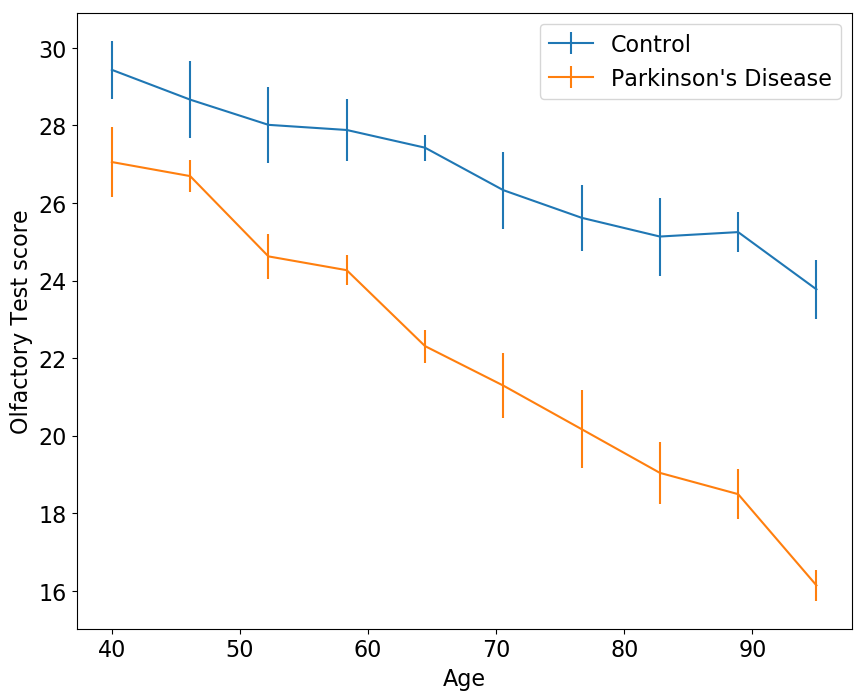

In [391]:
t = np.linspace(40,95,10)
control = 30 - (t-20)*0.1 + 3*np.random.rand(5,10) # 5 patients, 10 time points
experimental = 30 - (t-20)*0.2 + 3*np.random.rand(5,10) # 5 patients, 10 time points
plt.errorbar(t,control.mean(axis=0),yerr=control.std(axis=0),label="Control")
plt.errorbar(t,experimental.mean(axis=0),yerr=experimental.std(axis=0),label="Parkinson's Disease")
plt.xlabel('Age')
plt.ylabel('Olfactory Test score');
plt.legend();

### Q) How do you visualize the results of many t-tests?

### A) Plot both effect size and p-values (the Volcano plot)

In [269]:
from scipy.stats import ttest_ind
n = 100 # 100 tests
p_values = np.empty(n) # Initialize p-values
t_scores = np.empty(n) # Initialize t-scores
effect_sizes = np.empty(n) # Initialize effect sizes
for i in range(n): # Iterate across tests
    sample_size = np.random.randint(10,100) # Make up a sample size for each test between 10 and 100.  
    control = np.random.rand(sample_size) # Random data for the control group
    experimental = np.random.rand(sample_size) + 0.25*(i%10 == 0) # Random data for the experimental group
                                                                 # Every 10th time through the loop, make
                                                                 # the experimental group have an effect
    effect_sizes[i] = experimental.mean()-control.mean() # Effect size is the ratio of the group means
    t_scores[i],p_values[i] = ttest_ind(control,experimental) # Perform a t-test on these independent samples

(-0.3, 0.3)

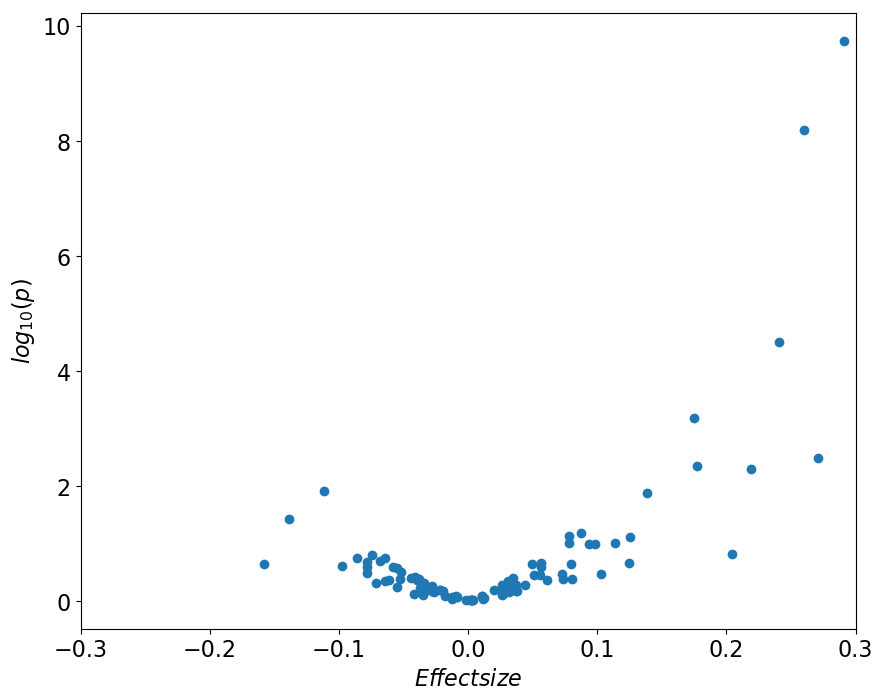

In [270]:
plt.scatter(effect_sizes,-np.log10(p_values))
plt.xlabel('$Effect size$')
plt.ylabel('$log_{10}(p)$')
plt.xlim(-0.3,0.3)

![volcano](https://img.huffingtonpost.com/asset/58b5fc5e1b00003600b5b289.jpeg)

### Related: The funnel plot for measuring publication bias

In [356]:
from scipy.stats import expon
n = 1000 # 100 tests
effect_sizes = np.empty(n) # Initialize effect sizes
standard_errors = np.empty(n) # Initialize standard errors
sample_sizes = expon.rvs(loc=5,scale=100,size=n).astype(int) # Make up a sample size for each test between 10 and 1000.
for i in range(n): # Iterate across tests
    control = 5 + np.random.randn(sample_sizes[i]) # Random data for the control group
    experimental = 5.2 + np.random.randn(sample_sizes[i])
    effect_sizes[i] = experimental.mean()-control.mean() # Effect size is the ratio of the group means
    standard_errors[i] = 1/np.sqrt(sample_sizes[i])

### If all the studies were published

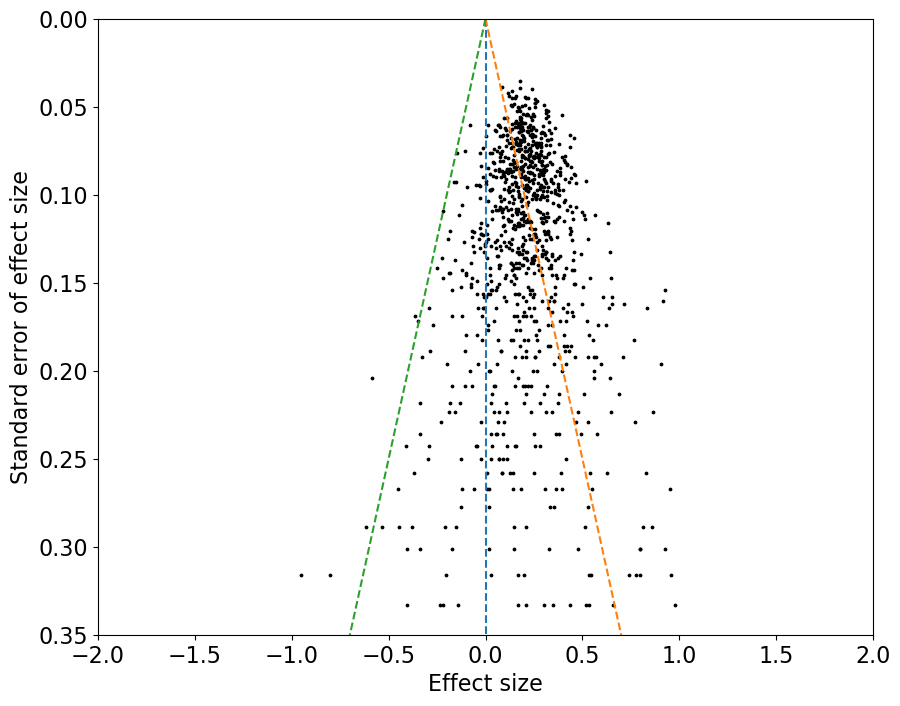

In [367]:
plt.scatter(effect_sizes,standard_errors,color='k',s=3)
def annotate():
    plt.xlabel('Effect size')
    plt.ylabel('Standard error of effect size');
    plt.xlim(-2,2)
    plt.ylim(0.35,0)
    plt.plot([0,0],[0,0.35],'--')
    plt.plot([0,1],[0,0.5],'--')
    plt.plot([0,-1],[0,0.5],'--')
annotate()

### If only the statistically significant studies were published

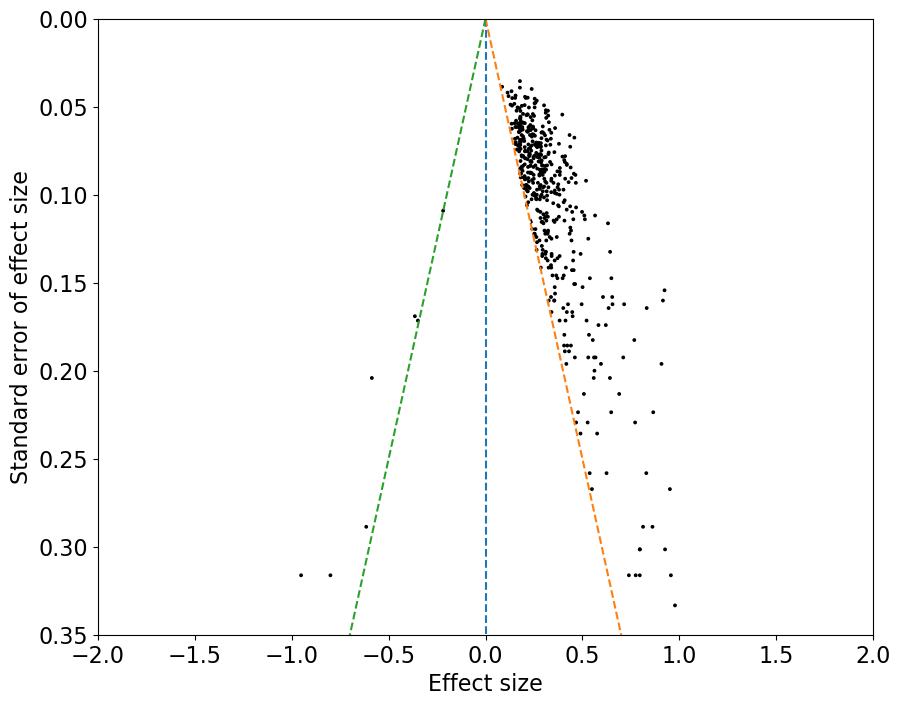

In [368]:
c = np.abs(effect_sizes) > 2*standard_errors
plt.scatter(effect_sizes,standard_errors,c=c,cmap='Greys',s=3)
annotate()